In [38]:
from random import shuffle

from PIL import Image

import quantumblur as qb

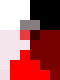

In [54]:
img = Image.open('minimal_nonsquare.png')
# X_MAX ~ WIDTH
# Y_MAX ~ HEIGHT
X_MAX, Y_MAX = img.size


def extract_colors(img, x_size, y_size):
    """Turn image into 2D array of (r, g, b) tuples."""
    pixels = img.load()
    colors = []
    
    for x in range(x_size):
        row = []
        for y in range(y_size):
            row.append(pixels[x, y])
        colors.append(row)
    return colors


def upscale_image(img, scale):
    """Upscale image by scale factor."""
    width, height = img.size
    new_width = width * scale
    new_height = height * scale

    new_img = Image.new('RGB', (new_width, new_height))
    pixels = new_img.load()

    for x in range(new_width):
        for y in range(new_height):
            orig_x = x // scale
            orig_y = y // scale
            orig_pixel = img.getpixel((orig_x, orig_y))

            pixels[x, y] = orig_pixel

    return new_img


def random_stamp_order(x_size, y_size):
    """Generate random order to stamp pixels in."""
    l = [(x, y) for x in range(y_size) for y in range(x_size)]
    shuffle(l)
    return l


def _stamp_in_location(img, location, y_max, x_max, color):
    """Do a single stamp in a specified location."""
    y, x = location
    pixels = img.load()
    
    # those will always fit
    pixels[x*2, y*2] = color
    pixels[x*2, y*2+1] = color
    pixels[x*2+1, y*2] = color
    pixels[x*2+1, y*2+1] = color
    
    # those might not fit near the edges
    if x != 0:
        pixels[x*2-1, y*2] = color
        pixels[x*2-1, y*2+1] = color
    
    if y != 0:
        pixels[x*2, y*2-1] = color
        pixels[x*2+1, y*2-1] = color

    if y < y_max - 1:
        pixels[x*2, y*2+2] = color
        pixels[x*2+1, y*2+2] = color
        
    if x < x_max - 1:
        pixels[x*2+2, y*2+1] = color
        pixels[x*2+2, y*2] = color

    return img


def stamp_all(img, original_rgb_list, order, y_max, x_max):
    """Perform all stamping in specified order."""
    two_x_img = upscale_image(img, 2)
    for (x, y) in order:
        img = _stamp_in_location(two_x_img, (x, y), y_max, x_max, color=original_rgb_list[y][x])
    return img

order = random_stamp_order(X_MAX, Y_MAX)
original_rgb_list = extract_colors(img, X_MAX, Y_MAX)
result = stamp_all(img, original_rgb_list, order, Y_MAX, X_MAX)
upscale_image(result, 10)